Problem statement: Plotting a monthly percentage return heatmap for Banknifty.

1. Plotting heatmap with the help of pivot
2. Manupulating heatmap according to our need

In [37]:
import numpy as np
import pandas as pd
import datetime

In [38]:
df = pd.read_csv('/content/3131.csv')

In [39]:
df.head()

,datetime,open,high,low,close,volume
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0


In [40]:
#extracting month from datatime
df['datetime'] = pd.to_datetime(df['datetime'])
df['Month'] = df['datetime'].dt.month

In [41]:
df.head()

,datetime,open,high,low,close,volume,Month
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0,1
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0,1
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0,1
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,1
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0,1


In [42]:
df.tail()

,datetime,open,high,low,close,volume,Month
3443,2019-12-18,32292.25,32293.65,32017.30,32244.25,0.0,12
3444,2019-12-19,32281.65,32328.35,32085.05,32241.45,0.0,12
3445,2019-12-20,32266.85,32443.35,32199.45,32384.95,0.0,12
3446,2019-12-23,32381.00,32502.80,32196.85,32339.45,0.0,12
3447,2019-12-24,32337.80,32390.35,32246.05,32280.75,0.0,12


In [43]:
#extracting year from datatime
df['Year'] = df['datetime'].dt.year

In [44]:
df.head()

,datetime,open,high,low,close,volume,Month,Year
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0,1,2006
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0,1,2006
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0,1,2006
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,1,2006
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0,1,2006


In [45]:
df['Month'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [46]:
df['Year'].unique()

array([2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016,
       2017, 2018, 2019])

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3448 entries, 0 to 3447
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3448 non-null   datetime64[ns]
 1   open      3448 non-null   float64       
 2   high      3448 non-null   float64       
 3   low       3448 non-null   float64       
 4   close     3448 non-null   float64       
 5   volume    3448 non-null   float64       
 6   Month     3448 non-null   int64         
 7   Year      3448 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 215.6 KB


In [48]:
df.drop_duplicates(inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3448 entries, 0 to 3447
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  3448 non-null   datetime64[ns]
 1   open      3448 non-null   float64       
 2   high      3448 non-null   float64       
 3   low       3448 non-null   float64       
 4   close     3448 non-null   float64       
 5   volume    3448 non-null   float64       
 6   Month     3448 non-null   int64         
 7   Year      3448 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 242.4 KB


In [50]:
#This will give first value from open column in a month 
month_open = df.groupby(['Year','Month']).open.first()
month_open

Year  Month
2006  1         4566.95
      2         4622.30
      3         4521.70
      4         4661.50
      5         4558.25
                 ...   
2019  8        28660.50
      9        27239.20
      10       29226.15
      11       30196.15
      12       32008.30
Name: open, Length: 168, dtype: float64

In [51]:
#This will give last value from close column in a month
month_close = df.groupby(['Year','Month']).close.last()
month_close

Year  Month
2006  1         4617.60
      2         4579.05
      3         4661.50
      4         4549.80
      5         4123.55
                 ...   
2019  8        27427.85
      9        29103.15
      10       30066.25
      11       31946.10
      12       32280.75
Name: close, Length: 168, dtype: float64

In [52]:
month_return = (month_close - month_open)/month_open

#converting to dataframe
df_monthR=pd.DataFrame(month_return)

In [53]:
df_monthR

0
Year Month          
2006 1      0.011091
     2     -0.009357
     3      0.030918
     4     -0.023962
     5     -0.095366
...              ...
2019 8     -0.043009
     9      0.068429
     10     0.028745
     11     0.057953
     12     0.008512

[168 rows x 1 columns]

In [54]:
#renaming last column of the dataframe
df_monthR.rename( columns={0 :'MonthlyReturn'}, inplace=True )

In [55]:
df_monthR

MonthlyReturn
Year Month               
2006 1           0.011091
     2          -0.009357
     3           0.030918
     4          -0.023962
     5          -0.095366
...                   ...
2019 8          -0.043009
     9           0.068429
     10          0.028745
     11          0.057953
     12          0.008512

[168 rows x 1 columns]

In [56]:
#rearranging the dataframe
MonthlyR = df_monthR.groupby(by=['Year', 'Month']).MonthlyReturn.sum().reset_index()
MonthlyR

,Year,Month,MonthlyReturn
0,2006,1,0.011091
1,2006,2,-0.009357
2,2006,3,0.030918
3,2006,4,-0.023962
4,2006,5,-0.095366
...,...,...,...
163,2019,8,-0.043009
164,2019,9,0.068429
165,2019,10,0.028745
166,2019,11,0.057953


<function matplotlib.pyplot.show>

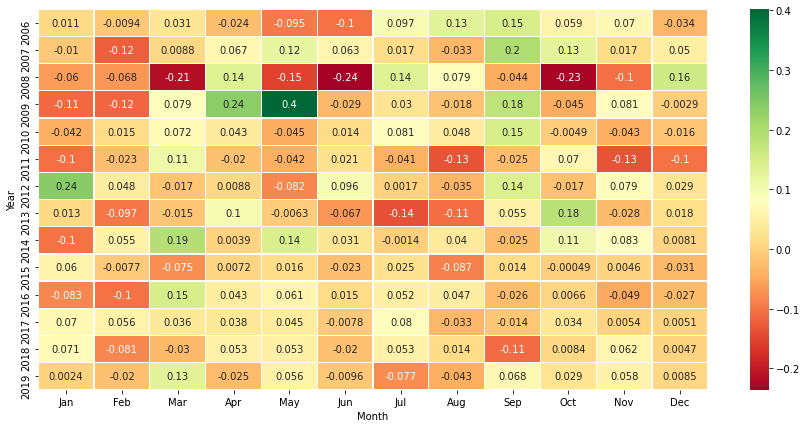

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

#refer to below link on using pivot
#https://cumsum.wordpress.com/2019/12/28/valueerror-index-contains-duplicate-entries-cannot-reshape/

MonthlyR = df_monthR.groupby(by=['Year', 'Month']).MonthlyReturn.sum().reset_index()

#creating pivot table
MonthlyR = MonthlyR.pivot_table(index="Year", columns="Month", values="MonthlyReturn")

#plotting heatmap
plt.figure(figsize=(15,7))
sns.heatmap(MonthlyR,annot=True,cmap="RdYlGn",linewidth=0.3)

#changing labels of x-axis
xticks_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(np.arange(12) + .5, labels=xticks_labels)
plt.show